# PROJET SEATTLE ENERGY BENCHMARKING
## Notebook 00 : initialisation de l'environnement et ingestion des données

---

### Identité du document
* **Statut :** Phase 1 (exploration & prototypage)
* **Date de création :** 26 Décembre 2025
* **Dernière mise à jour :** 31 Décembre 2025
* **Dépendances notebooks**: Aucune

### Description
Ce notebook établit les fondations du projet. Il assure la mise en place de l'infrastructure et la configuration des outils de gestion . L'objectif est de garantir une base reproductible avant d'entamer l'audit de qualité.

### Objectifs principaux
1. Initialiser le système de gestion de configuration via Hydra.
2. Déployer l'arborescence des répertoires du projet.
3. Récupérer et charger le jeu de données source (Immuable).
4. Établir un premier diagnostic structurel des données chargées.

### Dépendances critiques
* `hydra` : Gestion de la configuration.
* `src.utils` & `src.data` : Modules internes de support.

### LIVRABLES
1. Environnement technique initialisé (Hydra, Dossiers).
2. Dataset brut dans `data/raw/`.
3. Dictionnaire de données initial (`reports/data_dictionary.md`) et une classification des variables
4. Note de synthèse structurelle.
5. Notebook propre

---

# 📚 Table des matières

- [Section 0 : Importation des packages](#section-0)
- [Section 1 : Configuration et initialisation](#section-1)
- [Section 2 : Chargement et inspection structurelle](#section-2)
- [Section 3 : Typologie des variables](#section-3)
- [Section 4 : Focus sur la variable cible](#section-4)
- [Section 5 : Identification des redondances apparentes](#section-5)
- [Section 6 : Note de synthese](#section-6)

>Note : les liens de la table des matières ne fonctionnent pas comme prévu. Référez-vous plutôt à la navigation intégrée de votre éditeur, par exemple l’outline dans VSCode.

<a id="section-0"></a>
# Section 0 : Importation des packages

In [1]:
import logging
import pandas as pd
from pathlib import Path


# Import des fonctions utilitaires 

import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
SRC_PATH = PROJECT_ROOT / "src"

if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))


from data.load_data import load_data_raw
from utils.config_loader import load_config, create_directories
from utils.eda_logger import setup_eda_logger

import seaborn as sns
import matplotlib.pyplot as plt
 


<a id="section-1"></a>
# Section 1:Configuration et initialisation

In [2]:
# Chargement de la configuration principale (Hydra)
cfg = load_config()

# Initialisation du logger
setup_eda_logger(cfg)
logger = logging.getLogger(__name__)

# Création des dossiers nécessaires à l'exécution (raw, interim, processed, reports, etc.)
create_directories(cfg)


2025-12-31 12:36:31,847 - utils.config_loader - INFO - Répertoire prêt : C:\Users\HP\Desktop\temp\TODO\SEMESTRE_1\ML1\ML-prediction-CO2\data\raw
2025-12-31 12:36:31,849 - utils.config_loader - INFO - Répertoire prêt : C:\Users\HP\Desktop\temp\TODO\SEMESTRE_1\ML1\ML-prediction-CO2\data\interim
2025-12-31 12:36:31,850 - utils.config_loader - INFO - Répertoire prêt : C:\Users\HP\Desktop\temp\TODO\SEMESTRE_1\ML1\ML-prediction-CO2\data\processed
2025-12-31 12:36:31,851 - utils.config_loader - INFO - Répertoire prêt : C:\Users\HP\Desktop\temp\TODO\SEMESTRE_1\ML1\ML-prediction-CO2\figures
2025-12-31 12:36:31,853 - utils.config_loader - INFO - Répertoire prêt : C:\Users\HP\Desktop\temp\TODO\SEMESTRE_1\ML1\ML-prediction-CO2\reports


<a id="section-2"></a>
# Section 2 : Chargement et inspection structurelle

Cette section se concentre sur le chargement initial des données à partir du fichier CSV et une inspection structurelle de base. L'objectif est d'obtenir une première vue d'ensemble du dataset, de vérifier son intégrité et d'identifier tout problème évident au niveau du format ou de la structure.

## Importation du CSV

In [3]:
# Chargement des données brutes
df_raw = load_data_raw(cfg)

# Validation dimensions
n_rows, n_cols = df_raw.shape
logger.info(f"Dataset chargé ({n_rows} lignes, {n_cols} colonnes)")



2025-12-31 12:36:31,899 - data.load_data - INFO - DataFrame chargé : 3376 lignes, 46 colonnes
2025-12-31 12:36:31,955 - data.load_data - INFO -  Intégrité des données validée (Aucune modification détectée).
2025-12-31 12:36:31,957 - __main__ - INFO - Dataset chargé (3376 lignes, 46 colonnes)


---
Le chargement nous donne un DataFrame avec 3376 lignes et 46 colonnes.

## Affichage pour première impression visuelle
---

In [4]:
# Forcer pandas à afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Forcer pandas à afficher toutes les lignes (si besoin)
pd.set_option("display.max_rows", None)

# Forcer pandas à afficher toute la largeur (évite les "...")
pd.set_option("display.width", None)



In [5]:
# Affichage des premières lignes
print("Premières 5 lignes :")
display(df_raw.head(5))

# Affichage des dernières lignes
print("Dernières 5 lignes :")
display(df_raw.tail(5))

# Affichage d'un échantillon aléatoire
print("Échantillon aléatoire de 20 lignes :")
display(df_raw.sample(20))

Premières 5 lignes :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Dernières 5 lignes :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,2,GREATER DUWAMISH,47.53939,-122.29536,1938,1.0,1,18258,0,18258,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8271.0,Fitness Center/Health Club/Gym,8000.0,Pre-school/Daycare,1108.0,NaN,NaN,63.099998,70.900002,115.800003,123.900002,1.152896e+06,1.293722e+06,0.0,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


Échantillon aléatoire de 20 lignes :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
507,690,2016,NonResidential,Large Office,One Convention Place,701 Pike Street,Seattle,WA,98101.0,5342900000,7,DOWNTOWN,47.61150,-122.33278,2001,1.0,23,538933,0,538933,"Office, Parking",Office,366554.0,Parking,122821.0,NaN,NaN,2017201520142013201120092008,90.0,43.700001,44.599998,137.199997,140.000000,1.602064e+07,1.633981e+07,0.000000e+00,4.695381e+06,16020640.0,0.000000,0.0,False,NaN,Compliant,NaN,111.69,0.21
109,176,2016,SPS-District K-12,K-12 School,Emerson Elementary,9709 60th Ave. S.,Seattle,WA,98118.0,7129302300,2,SOUTHEAST,47.51482,-122.25864,2001,1.0,3,78804,0,78804,K-12 School,K-12 School,78804.0,NaN,NaN,NaN,NaN,NaN,92.0,31.700001,34.000000,76.900002,79.300003,2.499140e+06,2.677621e+06,0.000000e+00,4.821847e+05,1645214.0,8539.256836,853926.0,True,NaN,Error - Correct Default Data,NaN,56.82,0.72
276,405,2016,NonResidential,Large Office,The Decatur,1511 6th Avenue,Seattle,WA,98101.0,1975700125,7,DOWNTOWN,47.61166,-122.33528,1921,1.0,4,127268,0,127268,"Non-Refrigerated Warehouse, Office, Retail Store",Office,62512.0,Retail Store,53971.0,Non-Refrigerated Warehouse,5000.0,NaN,71.0,63.500000,63.500000,171.500000,171.500000,7.711758e+06,7.711758e+06,7.145237e+05,1.770166e+06,6039805.0,9574.279297,957428.0,True,NaN,Error - Correct Default Data,NaN,148.11,1.16
2168,24711,2016,NonResidential,Small- and Mid-Sized Office,Fobes Building - 558,558 1st Avenue South,Seattle,WA,98104.0,7666206865,2,DOWNTOWN,47.59657,-122.33394,1910,1.0,5,32250,0,32250,Office,Office,32250.0,NaN,NaN,NaN,NaN,NaN,92.0,24.700001,26.900000,69.199997,73.800003,7.960424e+05,8.662419e+05,0.000000e+00,1.959201e+05,668479.0,1275.630127,127563.0,False,NaN,Compliant,NaN,11.44,0.35
520,706,2016,NonResidential,Large Office,333 Elliott West,333 Elliott Ave W,Seattle,WA,98119.0,7666202160,7,MAGNOLIA / QUEEN ANNE,47.62101,-122.36188,2008,1.0,5,183964,46763,137201,"Data Center, Office, Parking",Office,133451.0,Parking,46763.0,Data Center,3750.0,NaN,56.0,108.300003,108.300003,340.000000,340.000000,1.485620e+07,1.485620e+07,0.000000e+00,4.354102e+06,14856198.0,0.000000,0.0,False,NaN,Compliant,NaN,103.57,0.56
537,727,2016,NonResidential,Distribution Center,2700 4th Ave S (Best Fixture/Filson),2700 4th Ave S,Seattle,WA,98134.0,7666204225,2,GREATER DUWAMISH,47.57940,-122.32848,1928,1.0,2,56876,0,56876,"Distribution Center, Office, Retail Store",Distribution Center,48400.0,Office,4276.0,Retail Store,4200.0,NaN,NaN,31.500000,35.400002,70.199997,74.400002,1.791716e+06,2.015777e+06,0.000000e+00,2.963902e+05,1011283.0,7804.320313,780432.0,False,NaN,Compliant,NaN,48.50,0.85
836,19946,2016,Multifamily LR (1-4),Low-Rise Multifamily,The Bering,233 14th Ave E,Seattle,WA,98112.0,0766850000,3,EAST,47.62102,-122.31472,1928,1.0,4,27182,0,27182,"Multifamily Housing, Parking",Multifamily Housing,27182.0,Parking,3200.0,NaN,NaN,NaN,37.0,74.300003,83.000000,100.699997,109.800003,2.019673e+06,2.256924e+06,0.000000e+00,8.631440e+04,294505.0,17251.679690,1725168.0,False,NaN,Compliant,NaN,93.68,3.45
2945,27598,2016,NonResidential,Worship Facility,St. Andrew Kim,11700 1st Ave. NE,Seattle,WA,98125.0,6411600330,5,NORTHWEST,47.71479,-122.32824,2002,1.0,1,24955,0,24955,Worship Facility,Worship Facility,24955.0,N

---
La colonne 'DataYear' est constante, ce qui est attendu puisque le dataset porte sur une seule campagne annuelle. Cette variable n’apporte donc pas de variance et pourra être ignorée dans la modélisation.

On observe une présence importante de valeurs manquantes dans les colonnes liées aux usages secondaires et tertiaires des bâtiments (SecondLargestPropertyUseType, ThirdLargestPropertyUseType, YearsENERGYSTARCertified, Comments). Cela traduit soit une absence d’information, soit des cas où le bâtiment n’a qu’un usage principal. Ces colonnes nécessiteront un exament approfondi.

Les colonnes lié à l'energie  montrent de nombreux zéros :  
- *PropertyGFAParking* est souvent à 0, ce qui est logique pour les bâtiments sans parking.  
- *SteamUse(kBtu)* et *NaturalGas(kBtu)* présentent des 0.00, ce qui peut indiquer une absence réelle de consommation ou une donnée manquante codée comme zéro. 
> Il faudra distinguer les deux cas pour éviter de biaiser les modèles. 


Electricity(kWh),la quantité annuelle d'éléctricité consommée présente d'énormes differences (ordre de grandeur),selon les batiments.

La colonne ComplianceStatus ( **Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours**), est presque toujours “Compliant”, ce qui suggère que la majorité des bâtiments respectent la réglementation. 

La colonne Outlier est vide avec des NaN, ce qui peut indiquer que les anomalies sont rares ou non encore identifiées.

---


## Informations structurelles

---

In [6]:
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
# Liste des colonnes
print("Colonnes :")
print(df_raw.columns.tolist())

Colonnes :
['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


---
Voir le dictionnaire des donnée dans raports/ pour des définitions

On constate que les types des variables sont coherent.(un int déguisé en float ne pose pas de probléme)

>La variable zipcode est identifié comme int mais dois être traité comme une variable qualitatif

> colonnes :46 au total, couvrant identifiants, localisation, caractéristiques, usages, performances, consommations, émissions

>le 'WN' signifie Weather Normalized, une normalisation importante pour comparer les années

Nous avons aussi quelques variables atypiques :

> **DefaultData** booléen pour usage de données par défaut
>**Outlier** Si une propriété est une valeur aberrante élevée ou faible (O/N)

Cela necessite une documentation plus approfondi

---

<a id="section-3"></a>
# Section 3 : Typologie des variables

---

Dans cette section, nous présentons le dictionnaire des données. Afin de garantir la cohérence et la fidélité aux sources, nous avons repris la documentation officielle et en avons traduit automatiquement les éléments essentiels. Les informations pertinentes ont été extraites et adaptées pour ce projet, de manière à offrir une lecture directe et exploitable.

Le document complet est disponible dans le dossier  reports/notebooks/data_dictionary_auto.pdf. Il constitue la référence officielle pour la description des variables et sera utilisé comme support de documentation dans le cadre du projet.

---

## Structure et cohérence des variables

---

On remarque que le dictionnaire est très riche et couvre à la fois des identifiants administratifs (OSEBuildingID, TaxParcelIdentificationNumber), des informations géographiques (adresse, latitude, longitude, quartier), et des caractéristiques physiques des bâtiments (année de construction, nombre d’étages, surface totale). Cette structuration permet de relier chaque enregistrement à une entité réelle et de contextualiser les mesures énergétiques.
Un point intéressant est la présence de variables redondantes ou complémentaires, comme PropertyGFATotal, PropertyGFAParking et PropertyGFABuilding(s).

---

## Données énergétiques et enjeux métier
---


SiteEUI, SourceEUI, consommation d’électricité, gaz, vapeur, émissions de GES, Ces variables traduisent directement l’objectif du benchmarking : comparer les bâtiments entre eux et identifier les leviers de réduction.
On note aussi la présence de champs qualitatifs comme ComplianceStatus ou Outlier, qui ajoutent une dimension réglementaire et statistique. Cela montre que le dataset n’est pas seulement descriptif, mais qu’il sert aussi à évaluer la conformité et détecter les anomalies.
Enfin, certaines colonnes sont très incomplètes (YearsENERGYSTARCertified, Comments, Outlier), ce qui rappelle une réalité humaine : la difficulté de collecter des données exhaustives. C’est une limite mais aussi une information précieuse sur la fiabilité et la représentativité des analyses.

---

## Classification des variables

---


### 1. Identification et localisation

Ces variables servent à identifier le bâtiment de manière unique et à le situer géographiquement.

| Variable | Type | Description |
| --- | --- | --- |
| **OSEBuildingID** | Numérique (ID) | Identifiant unique de la propriété. |
| **PropertyName** | Texte | Nom officiel du bâtiment. |
| **TaxParcelIdentificationNumber** | Texte | Identifiant fiscal de la parcelle (King County). |
| **Address** | Texte | Adresse physique. |
| **City** | Texte | Ville (Seattle). |
| **State** | Texte | État (WA). |
| **ZipCode** | Catégoriel | Code postal. |
| **CouncilDistrictCode** | Catégoriel | District municipal (1 à 7). |
| **Neighborhood** | Catégoriel | Zone de quartier définie par la ville. |
| **Latitude** | Numérique | Coordonnée géographique nord-sud. |
| **Longitude** | Numérique | Coordonnée géographique est-ouest. |

---

### 2. Caractéristiques morphologiques et temporelles

Variables décrivant la structure physique et l'âge du bâtiment.

| Variable | Type | Description |
| --- | --- | --- |
| **DataYear** | Temporel | Année de l'enregistrement (2016). |
| **YearBuilt** | Temporel | Année de construction ou de rénovation majeure. |
| **NumberofBuildings** | Numérique | Nombre de bâtiments sur le site. |
| **NumberofFloors** | Numérique | Nombre d'étages du bâtiment. |
| **PropertyGFATotal** | Numérique | Surface totale (Bâtiment + Parking) en pieds carrés. |
| **PropertyGFABuilding(s)** | Numérique | Surface brute hors parking. |
| **PropertyGFAParking** | Numérique | Surface totale des parkings. |

---

### 3. Typologie et usage des sols

Classification du bâtiment selon son activité principale et secondaire.

| Variable | Type | Description |
| --- | --- | --- |
| **BuildingType** | Catégoriel | Classification globale (ex: NonResidential, Campus). |
| **PrimaryPropertyType** | Catégoriel | Usage principal (>50%) selon Portfolio Manager. |
| **ListOfAllPropertyUseTypes** | Texte | Liste exhaustive de tous les usages sur le site. |
| **LargestPropertyUseType** | Catégoriel | Usage occupant la plus grande surface. |
| **LargestPropertyUseTypeGFA** | Numérique | Surface associée à l'usage le plus important. |
| **SecondLargestPropertyUseType** | Catégoriel | Deuxième usage par importance de surface. |
| **SecondLargestPropertyUseTypeGFA** | Numérique | Surface associée au deuxième usage. |
| **ThirdLargestPropertyUseType** | Catégoriel | Troisième usage par importance de surface. |
| **ThirdLargestPropertyUseTypeGFA** | Numérique | Surface associée au troisième usage. |

---

### 4. Performance et Certification

Indicateurs d'efficacité énergétique et labels environnementaux.

| Variable | Type | Description |
| --- | --- | --- |
| **ENERGYSTARScore** | Numérique (0-100) | Score de performance relative (EPA). |
| **YearsENERGYSTARCertified** | Texte | Historique des années de certification Energy Star. |

---

### 5. Intensité d'usage de l'Énergie (EUI)

Ratios de consommation par unité de surface, normalisés ou non (Indicateurs clés de performance).

| Variable | Type | Unité | Description |
| --- | --- | --- | --- |
| **SiteEUI(kBtu/sf)** | Numérique | kBtu/sq.ft | Énergie consommée sur site par pied carré. |
| **SiteEUIWN(kBtu/sf)** | Numérique | kBtu/sq.ft | EUI du site normalisé selon la météo. |
| **SourceEUI(kBtu/sf)** | Numérique | kBtu/sq.ft | Énergie à la source (inclut pertes réseau) par pied carré. |
| **SourceEUIWN(kBtu/sf)** | Numérique | kBtu/sq.ft | Source EUI normalisé selon la météo. |

---

### 6. Consommation Énergétique par source

Volumes de consommation bruts selon le type d'énergie.

| Variable | Type | Unité | Description |
| --- | --- | --- | --- |
| **SiteEnergyUse(kBtu)** | Numérique | kBtu | Consommation totale annuelle du site. |
| **SiteEnergyUseWN(kBtu)** | Numérique | kBtu | Consommation totale normalisée (météo). |
| **Electricity(kWh)** | Numérique | kWh | Consommation électrique brute. |
| **Electricity(kBtu)** | Numérique | kBtu | Consommation électrique convertie en kBtu. |
| **NaturalGas(therms)** | Numérique | therms | Consommation de gaz naturel brute. |
| **NaturalGas(kBtu)** | Numérique | kBtu | Consommation de gaz naturel convertie en kBtu. |
| **SteamUse(kBtu)** | Numérique | kBtu | Consommation de vapeur urbaine. |

---

### 7. Émissions de gaz à effet de serre 

Mesure de l'impact environnemental du bâtiment.

| Variable | Type | Unité | Description |
| --- | --- | --- | --- |
| **TotalGHGEmissions** | Numérique | Tonnes CO2e | Émissions totales de gaz à effet de serre. |
| **GHGEmissionsIntensity** | Numérique | kg CO2e/sq.ft | Émissions par unité de surface. |

---

### 8. qualité des données et conformité

Variables indiquant la fiabilité des informations et l'état réglementaire.

| Variable | Type | Description |
| --- | --- | --- |
| **DefaultData** | Booléen | Indique si des valeurs par défaut ont été utilisées. |
| **ComplianceStatus** | Catégoriel | Statut vis-à-vis de l'ordonnance de benchmarking. |
| **Outlier** | Catégoriel | Indique si la donnée est une valeur aberrante. |
| **Comments** | Texte | Remarques textuelles additionnelles (très peu rempli). |

---

<a id="section-4"></a>
# Section 4 : Focus sur la variable cible
---

## La cible ou les cibles ?
---
En examinant le dataset de plus près, deux variables apparaissent comme candidates possibles pour servir de cible dans notre modéle:
- **TotalGHGEmissions** :
    C’est la variable la plus directe : elle mesure les émissions totales de gaz à effet de serre en tonnes de CO₂ équivalent. Elle constitue le choix naturel pour une prédiction brute des émissions.


- **GHGEmissionsIntensity**:
    Il s’agit d’une version normalisée : les émissions par unité de surface (kg CO₂e par pied carré). Cette variable est particulièrement utile pour comparer des bâtiments de tailles différentes ou pour prédire une intensité plutôt qu’un volume absolu.
Prédire les émissions totales met en avant l’effet de la taille des bâtiments, puisque les plus grands tendent à générer davantage d’émissions. À l’inverse, prédire l’intensité permet de comparer l’efficacité énergétique indépendamment de la surface. Dans un projet de benchmarking, l’intensité est souvent plus parlante pour les décideurs, car elle reflète la performance relative, tandis que les émissions totales restent cruciales pour évaluer l’impact environnemental global.

---


## Vers un modéle multi-output ?

Ces deux variables sont normalement corrélées : l’intensité découle directement des émissions totales rapportées à la surface. Plutôt que de choisir uniquement l’une d’elles, il est possible d’envisager un modèle multi‑output capable de prédire simultanément les émissions absolues et l’intensité. Cette approche permet de capturer à la fois l’impact global et l’efficacité relative, offrant une vision plus complète pour l’analyse et la prise de décision.

---

Corrélation entre TotalGHGEmissions et GHGEmissionsIntensity : 0.470


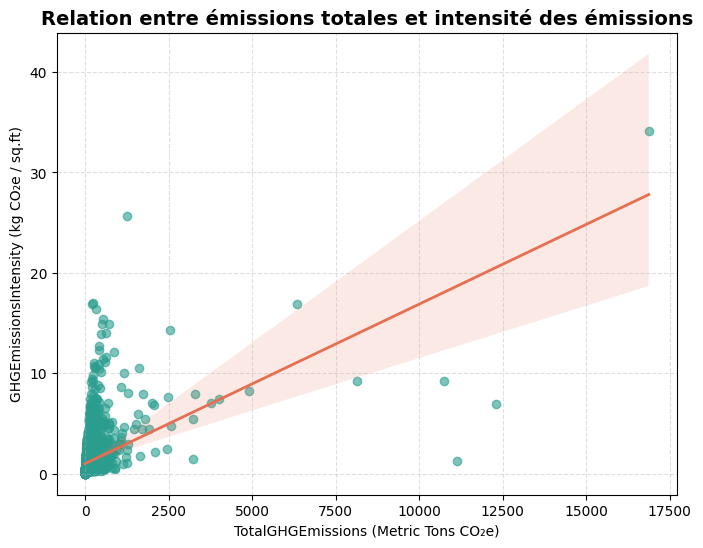

In [8]:
# Corrélation entre TotalGHGEmissions et GHGEmissionsIntensity
corr_value = df_raw[['TotalGHGEmissions', 'GHGEmissionsIntensity']].corr().iloc[0,1]
print(f"Corrélation entre TotalGHGEmissions et GHGEmissionsIntensity : {corr_value:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(
    data=df_raw,
    x="TotalGHGEmissions",
    y="GHGEmissionsIntensity",
    scatter_kws={"alpha":0.6, "color":"#2a9d8f"}, 
    line_kws={"color":"#e76f51", "lw":2}           
)
plt.title("Relation entre émissions totales et intensité des émissions", fontsize=14, weight="bold")
plt.xlabel("TotalGHGEmissions (Metric Tons CO₂e)")
plt.ylabel("GHGEmissionsIntensity (kg CO₂e / sq.ft)") # 1 sq.ft = 1 pied × 1 pied = environ 0,0929 m²
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


---
La corrélation entre les émissions totales et l’intensité est modérée (0.47), ce qui indique une relation partielle mais non linéaire.
Visuellement, on observe une tendance générale : les bâtiments qui émettent beaucoup ont souvent une intensité élevée, mais ce n’est pas systématique.

Certains bâtiments de grande taille peuvent avoir des émissions totales élevées tout en conservant une intensité relativement faible, ce qui reflète une meilleure efficacité énergétique.

À l’inverse, des bâtiments plus petits peuvent présenter une intensité élevée malgré des émissions totales modestes, ce qui peut signaler une mauvaise performance énergétique.


Source :  https://www.geeksforgeeks.org/machine-learning/multioutput-regression-in-machine-learning/ :
 selon cet article, la multi-output regression sert à prédire plusieurs variables continues simultanément, ce qui est particulièrement utile lorsque les sorties sont **interconnectées ou qu’il est plus efficace de les estimer conjointement** plutôt que séparément.

Dans notre cas, la corrélation modérée observée entre les émissions totales et l’intensité énergétique signifie qu’il existe une certaine relation, mais qu’elle n’est pas suffisamment forte pour garantir, à priori, un avantage substantiel à un modèle multi-sortie plutôt qu’à deux modèles séparés. Une corrélation de ce niveau n’implique pas une dépendance très prononcée entre les cibles, ce qui laisse ouverte la possibilité que des modèles distincts soient tout aussi performants et plus simples à analyser.

> **Conclusion :** il n’est pas évident qu’un modèle multi-output apporterait un gain significatif par rapport à des modèles séparés. Il est donc cohérent, selon nos objectifs et pour rester conforme à la méthodologie enseignée, soit de choisir une seule cible principale, soit d’entraîner deux modèles séparés pour chaque variable, afin de garder une approche simple et interprétable. 


---
## premières statistiques descriptives

Dans la suite nous allons nous concentrer sur les deux variables

In [9]:
def analyse_variable(df, var_name):
    """
    Analyse descriptive d'une variable numérique :
    - Statistiques descriptives
    - Valeurs manquantes
    - Valeurs négatives et nulles
    """
    print(f"\n### Statistiques pour {var_name} :")
    display(df[var_name].describe())

    # Valeurs manquantes
    missing = df[var_name].isnull().sum()
    print(f"Valeurs manquantes : {missing} ({missing / len(df) * 100:.2f}%)")

    # Valeurs négatives et nulles
    negatives = (df[var_name] < 0).sum()
    zeros = (df[var_name] == 0).sum()
    print(f"Valeurs négatives : {negatives} | Valeurs nulles : {zeros}")


### Pour TotalGHGEmissions:

In [10]:
analyse_variable(df=df_raw, var_name="TotalGHGEmissions")


### Statistiques pour TotalGHGEmissions :


count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Valeurs manquantes : 9 (0.27%)
Valeurs négatives : 1 | Valeurs nulles : 9


---
Les statistiques descriptives de la variable **TotalGHGEmissions** montrent une distribution très hétérogène. Sur les 3 367 observations disponibles, la moyenne des émissions s’élève à environ 119,7 tonnes de CO₂ équivalent, tandis que la médiane est nettement plus faible (33,9). Cet écart important entre moyenne et médiane révèle une **forte asymétrie à droite**, due à la présence de bâtiments très fortement émetteurs qui tirent la moyenne vers le haut. Cette impression est confirmée par l’écart-type élevé (538,8), largement supérieur à la moyenne.

Les valeurs extrêmes sont particulièrement marquées : le maximum atteint près de 16 871 tonnes, alors que le premier quartile est inférieur à 10 tonnes. Cela traduit une **dispersion très importante des niveaux d’émissions**, probablement liée à la diversité des tailles, des usages et des performances énergétiques des bâtiments du jeu de données.

On observe également la présence d’une **valeur négative** (-0,8), ce qui est théoriquement incohérent pour une variable d’émissions de gaz à effet de serre. Cette observation devra être traitée lors du nettoyage des données, soit par suppression, soit par correction, selon les hypothèses retenues. Par ailleurs, neuf valeurs nulles sont recensées, ainsi que neuf valeurs manquantes (soit 0,27 % de l’échantillon), ce qui reste marginal mais nécessite néanmoins une décision méthodologique explicite.

Dans l’ensemble, ces caractéristiques statistiques indiquent que **TotalGHGEmissions** est une variable très asymétrique, sensible aux valeurs extrêmes et sujette à quelques incohérences ponctuelles. Cela justifie, pour la suite de l’analyse, une réflexion sur le prétraitement (gestion des outliers, transformation logarithmique) et renforce l’intérêt de comparer cette variable à l’intensité des émissions, qui capte une logique différente et potentiellement plus stable.


### Pour GHGEmissionsIntensity

In [11]:
analyse_variable(df=df_raw, var_name="GHGEmissionsIntensity")


### Statistiques pour GHGEmissionsIntensity :


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

Valeurs manquantes : 9 (0.27%)
Valeurs négatives : 1 | Valeurs nulles : 12


---
Les statistiques descriptives de la variable GHGEmissionsIntensity indiquent une distribution globalement plus concentrée que celle des émissions totales, avec une moyenne d’environ 1,18 et une médiane à 0,61. Comme pour TotalGHGEmissions, l’écart entre moyenne et médiane ainsi que la valeur maximale élevée (34,09) suggèrent une asymétrie à droite, bien que moins extrême en valeur absolue. L’écart-type relativement important au regard de la moyenne traduit une hétérogénéité notable des performances énergétiques des bâtiments.

On observe également la présence d’une valeur négative (-0,02), qui est théoriquement incohérente pour une intensité d’émissions et devra être traitée lors du nettoyage des données. Les valeurs nulles sont légèrement plus nombreuses que pour les émissions totales (12 observations), tandis que la proportion de valeurs manquantes reste identique et faible (0,27 %), ce qui limite l’impact potentiel sur l’analyse globale

### Synthése

Les émissions totales présentent une dispersion beaucoup plus marquée, fortement influencée par la taille et l’usage des bâtiments, tandis que l’intensité des émissions offre une mesure plus relative de la performance énergétique. Les deux variables sont donc complémentaires, mais reflètent des mécanismes distincts qui justifient une réflexion spécifique sur le choix de la cible de modélisation.

## Un petit visuelle !

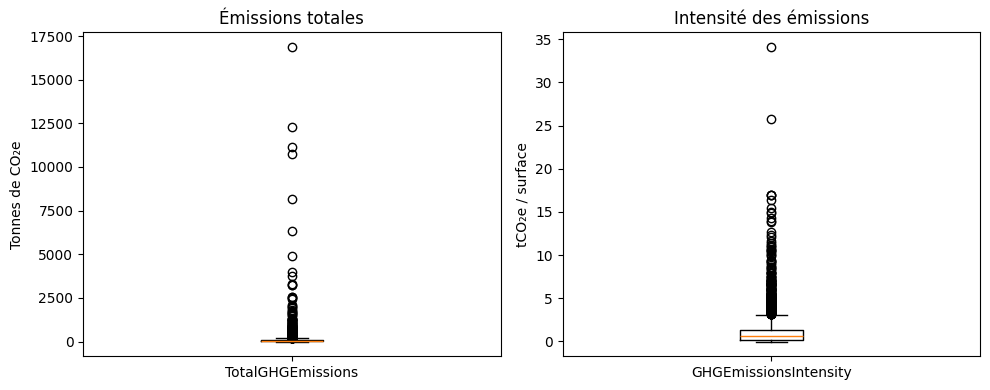

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=False)

# Total GHG Emissions
axes[0].boxplot(
    df_raw['TotalGHGEmissions'].dropna(),
    tick_labels=["TotalGHGEmissions"]
)
axes[0].set_ylabel("Tonnes de CO₂e")
axes[0].set_title("Émissions totales")

# GHG Emissions Intensity
axes[1].boxplot(
    df_raw['GHGEmissionsIntensity'].dropna(),
    tick_labels=["GHGEmissionsIntensity"]
)
axes[1].set_ylabel("tCO₂e / surface")
axes[1].set_title("Intensité des émissions")

plt.tight_layout()
plt.show()


---
La comparaison entre les deux distributions révèle des différences marquées dans la structure des données.
- Pour les émissions totales, 75 % des bâtiments présentent des valeurs inférieures à environ 500 tonnes de CO₂e, mais certains dépassent largement les 2 000 tonnes. Cette dispersion extrême indique que quelques bâtiments très grands ou très énergivores dominent la distribution, rendant l’analyse globale sensible aux outliers.
- À l’inverse, l’intensité des émissions est beaucoup plus concentrée : 75 % des bâtiments restent sous les 2.5 kg CO₂e par pied carré environ, avec des valeurs maximales qui dépassent rarement les 30. Cette distribution plus resserrée autour de la médiane permet une lecture plus stable et une comparaison plus fiable entre bâtiments.

<a id="section-5"></a>
# Section 5 : Identification des redondances apparentes

Redondances réduisent l'efficacité ; les identifier aide au cleaning.


## Candidats identifiés pour la redondance

| Groupe | Variables concernées | Raison |
| --- | --- | --- |
| **Électricité** | `Electricity(kWh)` vs `Electricity(kBtu)` | Conversion fixe :  |
| **Gaz Naturel** | `NaturalGas(therms)` vs `NaturalGas(kBtu)` | Conversion fixe :  |
| **Surface (GFA)** | `PropertyGFATotal` vs `Parking` + `Building(s)` | Le total est la somme des parties. |
| **Usage GFA** | `PropertyGFABuilding(s)` vs Somme des `LargestUseTypeGFA` | Le bâtiment est divisé par types d'usage. |

---



> Le notebook 1 sur le cleaning nous en dira des nouvelles !

<a id="section-6"></a>
# Section 6 :Note de synthése

Voir le reports/notebook_0  
#TODO: A faire